### Introduction

YouTube is a popular video sharing platform where users can upload, watch, and share videos. It was founded in 2005 and has since grown to become one of the most widely used websites on the internet, with over 2 billion monthly active users. The platform allows individuals and organizations to share a wide variety of content, including music videos, comedy sketches, educational videos, vlogs, and more. YouTube has become an essential tool for content creators, businesses, and advertisers to reach a wide audience and engage with their viewers.

As of February 2023, [MrBeast](https://www.youtube.com/@MrBeast) is the most-subscribed YouTuber, with 134 million subscribers. [PewDiePie](https://www.youtube.com/@PewDiePie) is the second most popular with 111 million subscribers.
To celebrate reaching 100 million subscribers, [MrBeast](https://www.youtube.com/@MrBeast) gave away a private island – which is probably a part of the reason he took the top position from [PewDiePie](https://www.youtube.com/@PewDiePie).

In [1]:
import opendatasets as od
import os
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

### Data Preparation and Cleaning

In [2]:
url = 'https://www.kaggle.com/datasets/themrityunjaypathak/most-subscribed-1000-youtube-channels'

In [4]:
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading most-subscribed-1000-youtube-channels.zip to .\most-subscribed-1000-youtube-channels


100%|██████████| 28.0k/28.0k [00:00<00:00, 737kB/s]

In [3]:
data_dir = './most-subscribed-1000-youtube-channels'

In [4]:
os.listdir(data_dir)

['topSubscribed.csv']

In [5]:
yt_df = pd.read_csv('./most-subscribed-1000-youtube-channels/topSubscribed.csv')

In [6]:
yt_df.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
1,2,YouTube Movies,"161,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"152,000,000","149,084,178,448",846,Education,2006
3,4,SET India,"150,000,000","137,828,094,104","103,200",Shows,2006
4,5,MrBeast,"128,000,000","21,549,128,785",733,Entertainment,2012


In [7]:
yt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             1000 non-null   int64 
 1   Youtube Channel  1000 non-null   object
 2   Subscribers      1000 non-null   object
 3   Video Views      1000 non-null   object
 4   Video Count      1000 non-null   object
 5   Category         1000 non-null   object
 6   Started          1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [8]:
yt_df.describe()

,Rank,Started
count,1000.000000,1000.000000
mean,500.500000,2012.594000
std,288.819436,4.110238
min,1.000000,1970.000000
25%,250.750000,2010.000000
50%,500.500000,2013.000000
75%,750.250000,2015.000000
max,1000.000000,2021.000000


In [9]:
yt_df.isna().sum()

Rank               0
Youtube Channel    0
Subscribers        0
Video Views        0
Video Count        0
Category           0
Started            0
dtype: int64

In [10]:
yt_df['Subscribers'] = yt_df['Subscribers'].str.replace(',', '').astype('int64')
yt_df['Video Views'] = yt_df['Video Views'].str.replace(',', '').astype('int64')
yt_df['Video Count'] = yt_df['Video Count'].str.replace(',', '').astype('int64')

In [11]:
yt_df['Category'] = yt_df['Category'].replace({'https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels': 'Miscellaneous'})

### Exploratory Analysis and Visualization

In [13]:
# Set default values for the graph plot
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 6)
matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['figure.facecolor'] = '#00000000'
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

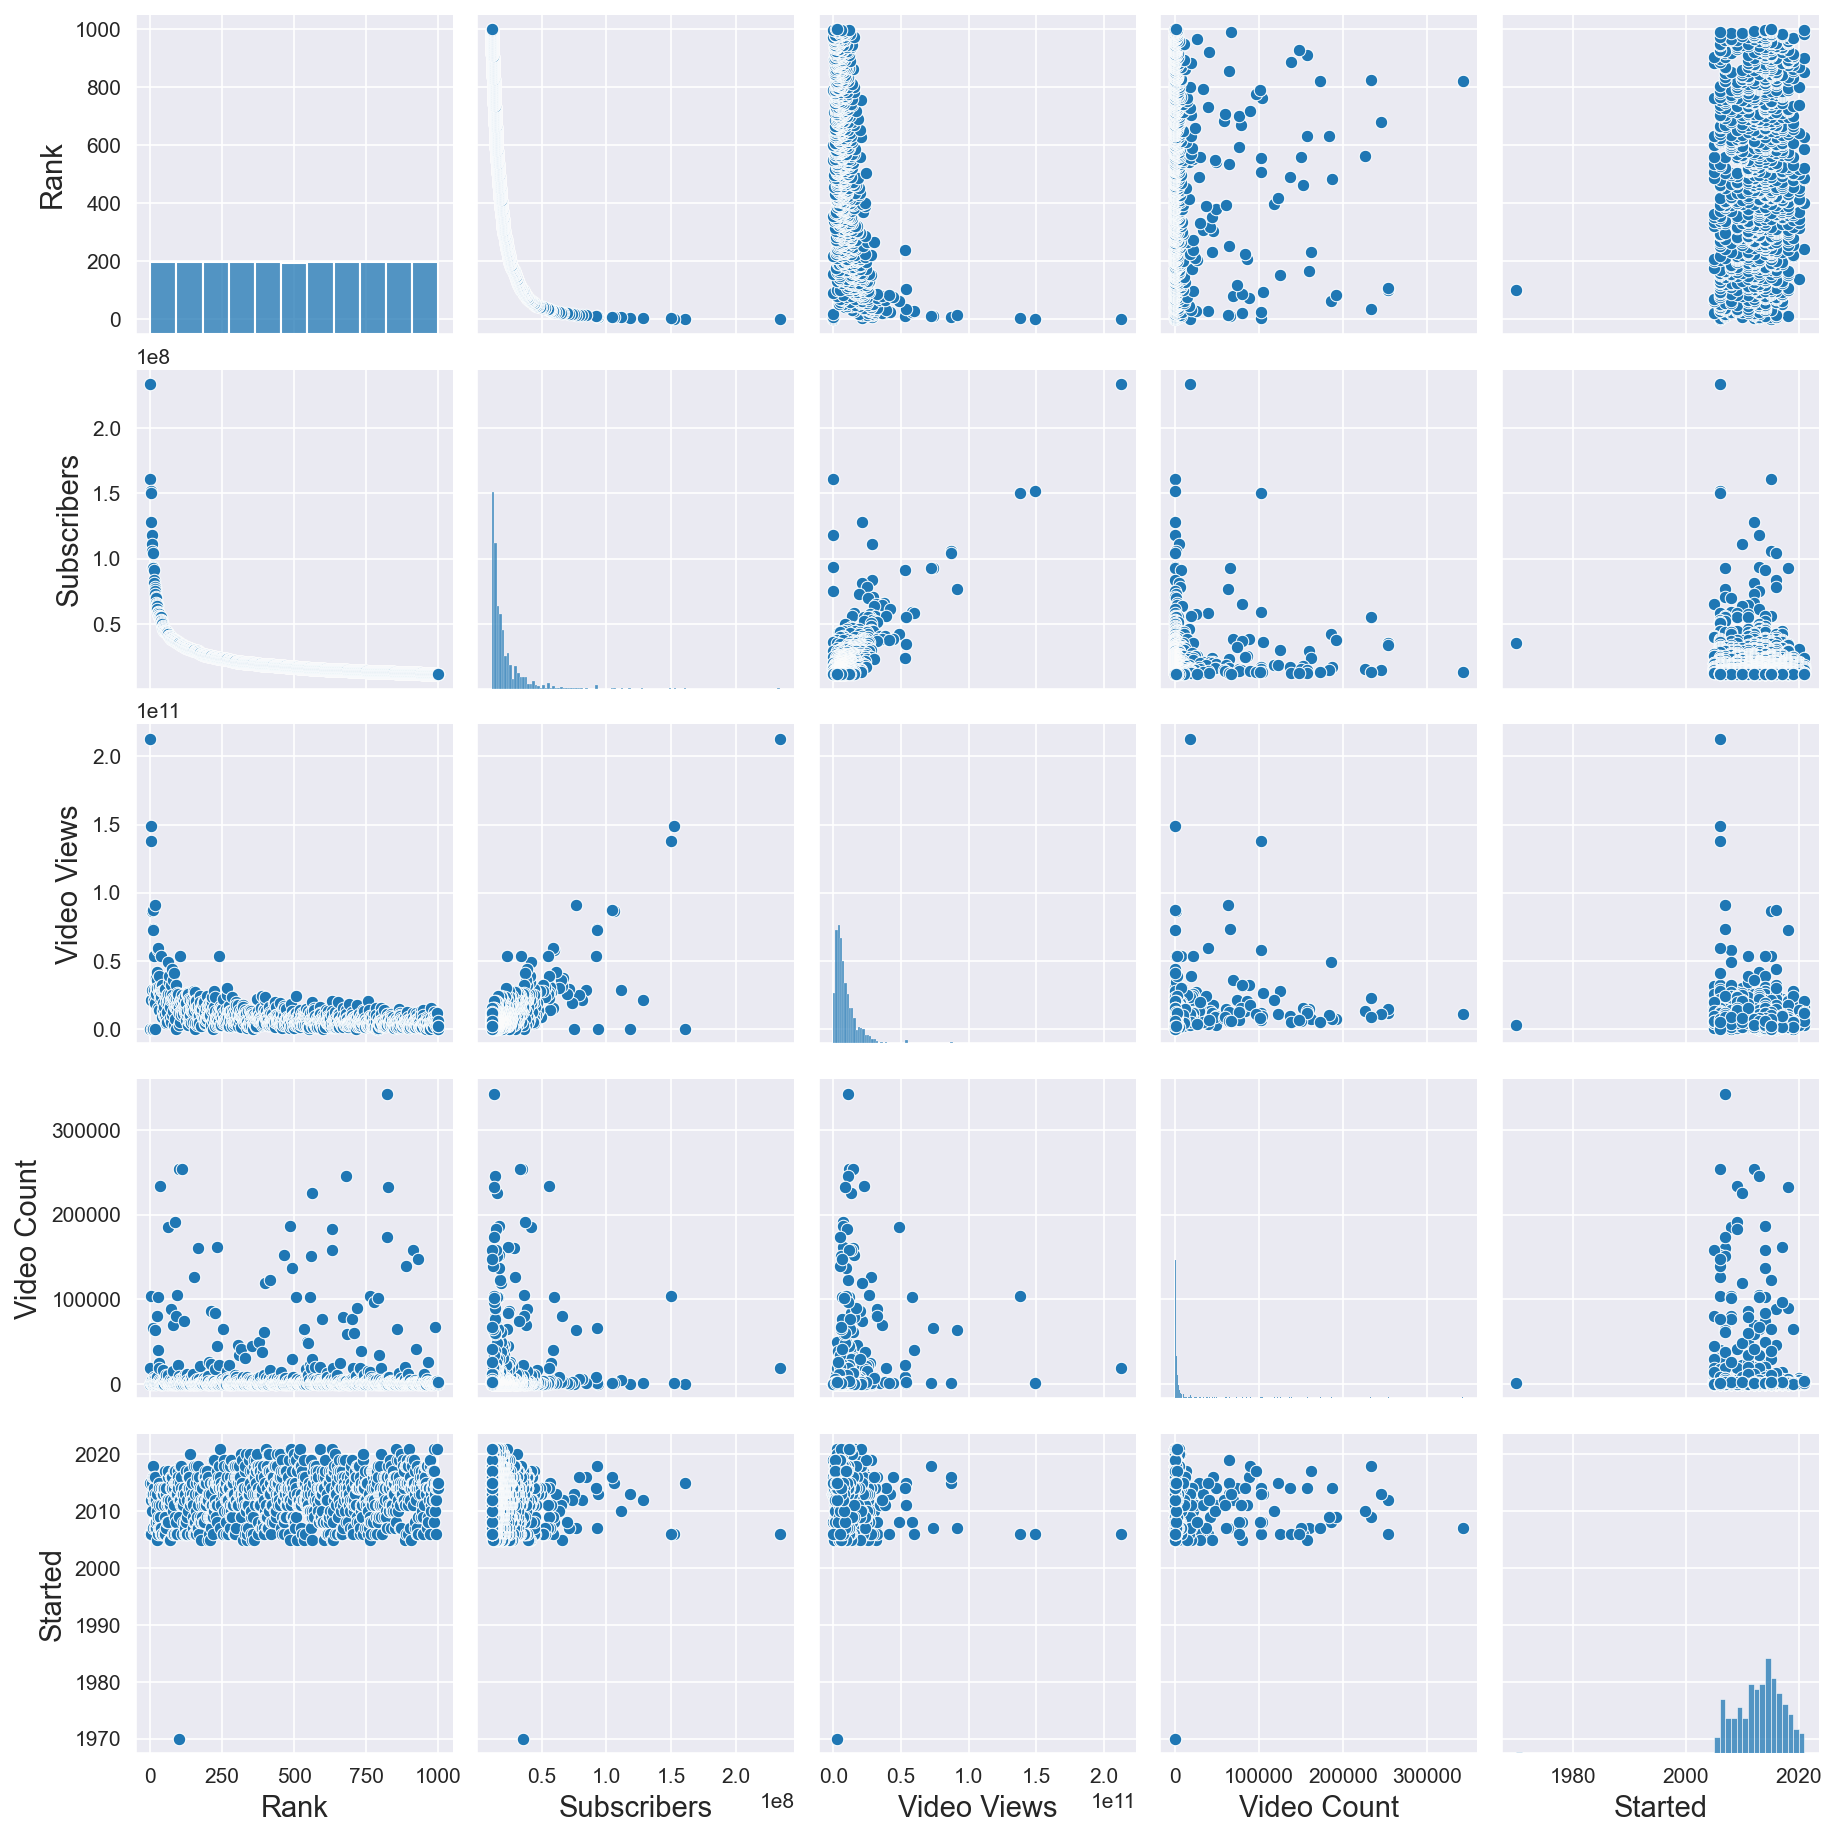

In [14]:
sns.pairplot(yt_df);

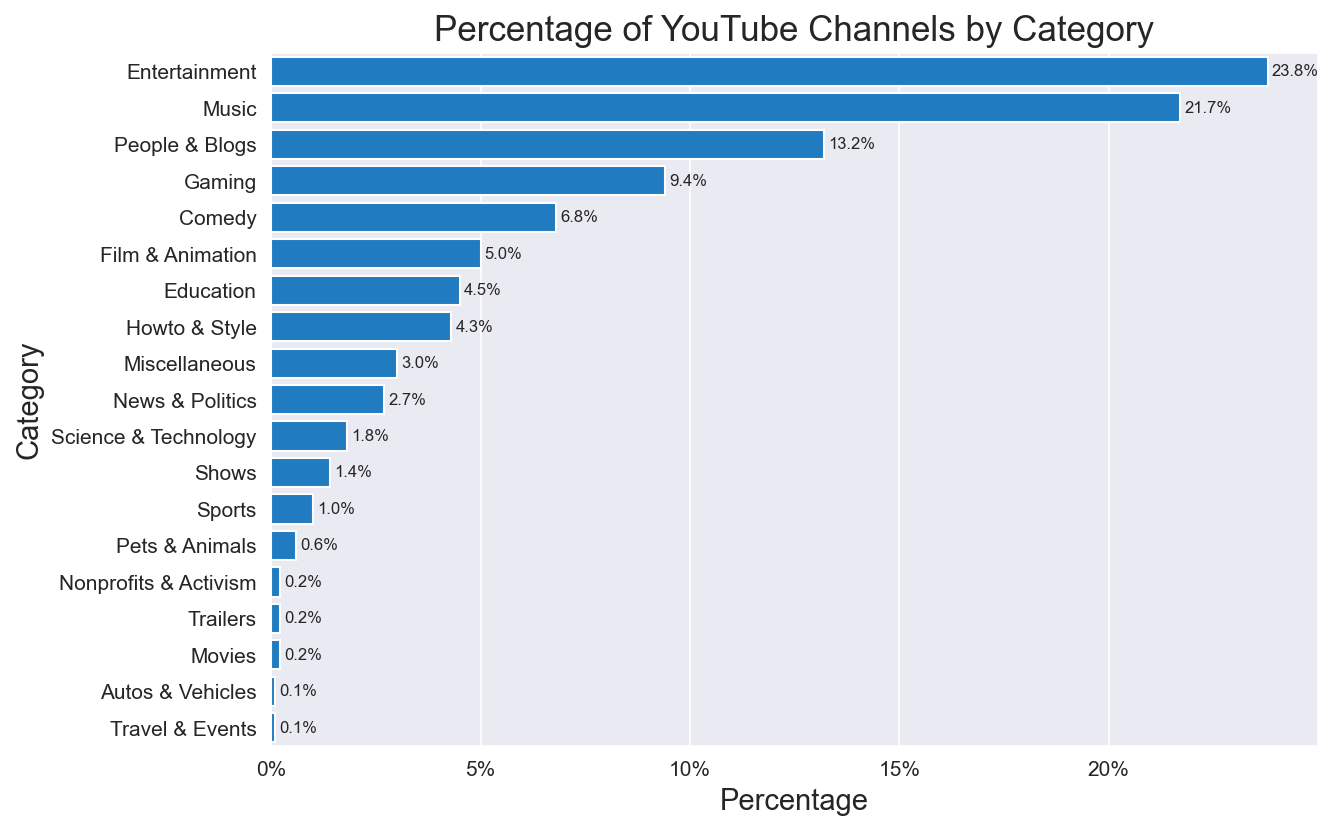

In [15]:
category = yt_df.groupby('Category', as_index=False)['Youtube Channel'].count().sort_values('Youtube Channel', ascending=False)
total_channels = category['Youtube Channel'].sum()
category['Percentage'] = round((category['Youtube Channel'] / total_channels) * 100, ndigits=2)
ax = sns.barplot(x='Percentage', y='Category', data=category, color='#057fdc')

# add labels to the bars
for p in ax.containers:
    for q in p.patches:
        x = q.get_width()
        y = q.get_y() + q.get_height() / 2
        ax.text(x+0.1, y, '{:.1f}%'.format(x), ha='left', va='center', fontsize=8)

# format x-tick labels as percentages
fmt = '{x:,.0f}%'
xticks = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)

plt.title('Percentage of YouTube Channels by Category');

we found that over 50% of the channels were categorized as one of the top three categories: Entertainment, Music, and People & Blogs. Conversely, less than 1% of the channels were categorized as Nonprofits & Activism, Trailers, Movies, Autos & Vehicles, and Travel & Events.

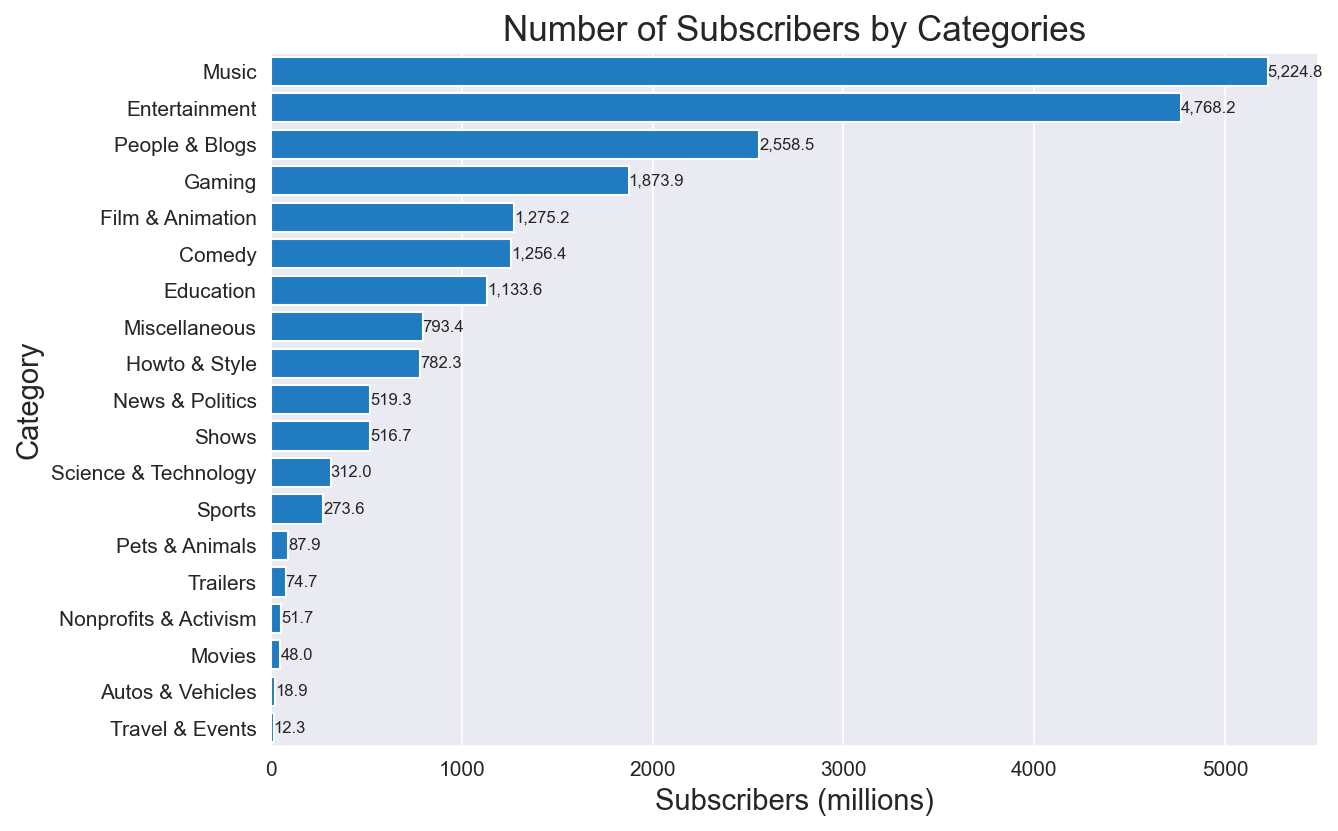

In [16]:
category_subscribers = yt_df.groupby('Category', as_index=False)['Subscribers'].sum().sort_values('Subscribers', ascending=False)
# convert subscriber counts to millions
category_subscribers['Subscribers (millions)'] = category_subscribers['Subscribers'] / 1000000

# create a bar plot with the new column
ax = sns.barplot(x='Subscribers (millions)', y='Category', data=category_subscribers, color='#057fdc')

# add labels to the bars
for p in ax.containers:
    for q in p.patches:
        x = q.get_width()
        y = q.get_y() + q.get_height() / 2
        ax.text(x+0.1, y, '{:,.1f}'.format(x), ha='left', va='center', fontsize=8)
plt.title('Number of Subscribers by Categories');

We can see that the Music and Entertainment categories have the highest number of subscribers, with Music having the most. The People & Blogs category is also fairly popular, with a significant number of subscribers. In contrast, the Nonprofits & Activism, Movies, Autos & Vehicles, and Travel & Events categories have the lowest number of subscribers, with Travel & Events having the fewest.

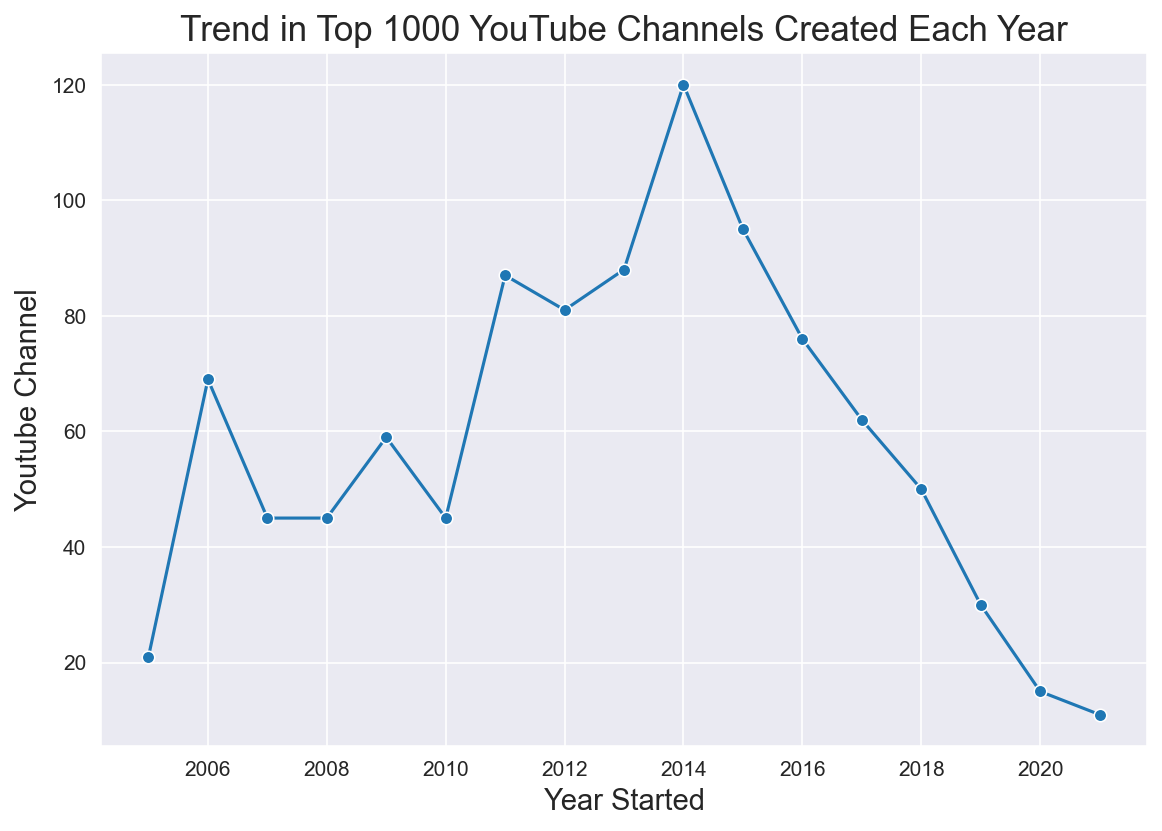

In [18]:
started = yt_df[(yt_df['Started'].isin([1970])== False)]
yt_started = started.groupby('Started', as_index= False)['Youtube Channel'].count()
sns.lineplot(x='Started', y='Youtube Channel', data=yt_started, marker = 'o')
plt.title('Trend in Top 1000 YouTube Channels Created Each Year')
plt.xlabel('Year Started');

As we can see, number channels created each year, decreases since 2015.

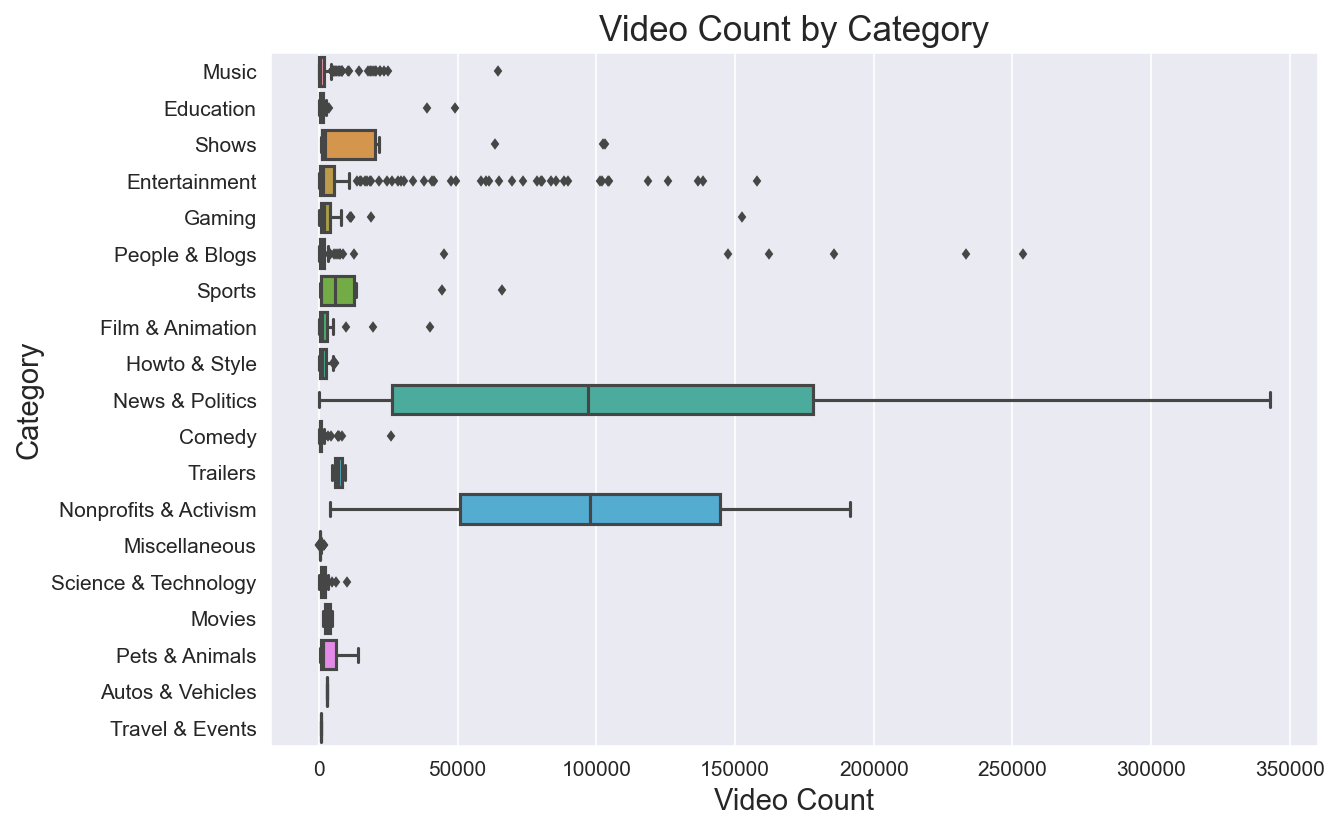

In [20]:
video_count = yt_df[(yt_df['Video Count'].isin([0])==False)]
ax = sns.boxplot(x='Video Count', y='Category', data=video_count, fliersize=3)
plt.title('Video Count by Category');

Non-profit & activism channels often produce videos to promote awareness and advocate for social causes. Similarly, News & Politics channels often produce multiple videos each day to cover breaking news and provide analysis, so it makes sense that they would also have a high number of videos.

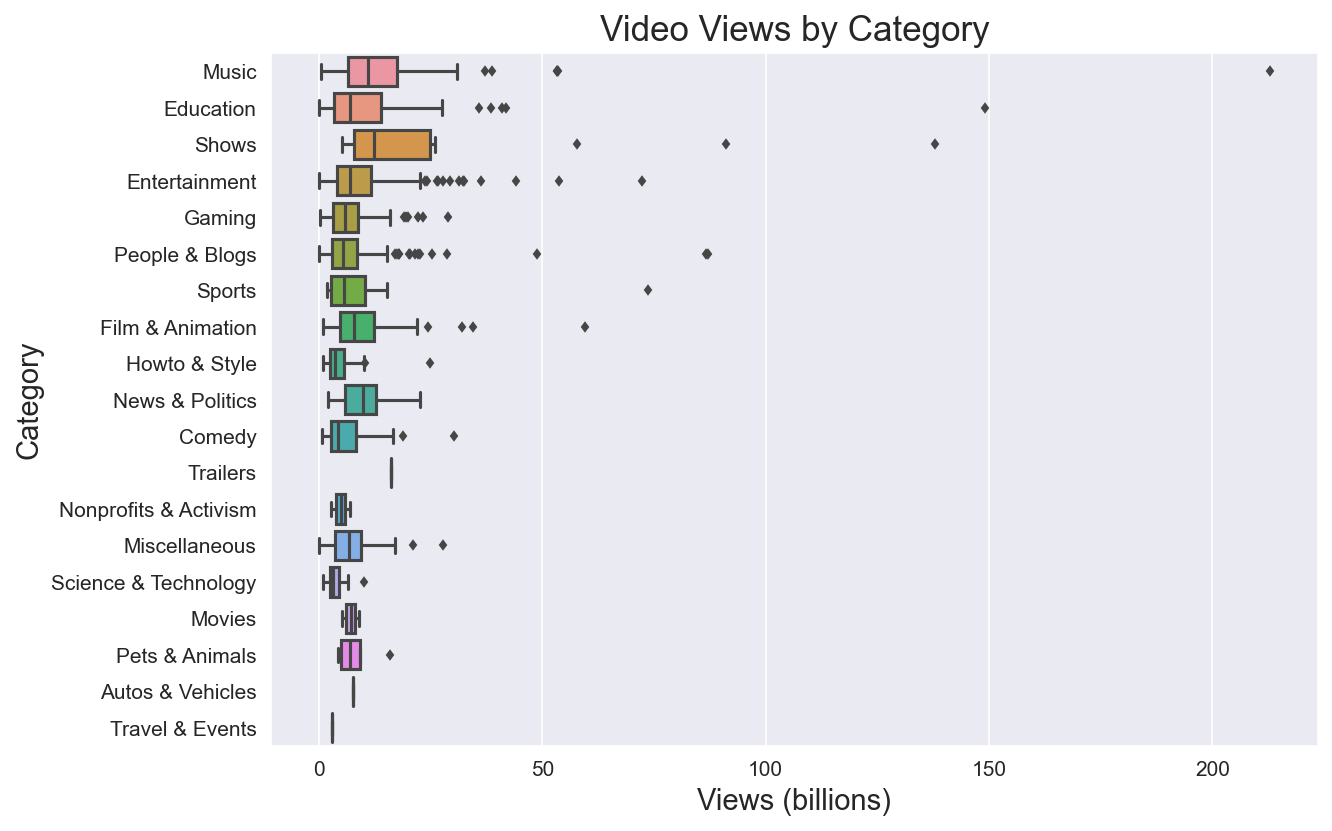

In [31]:
video_views = yt_df[(yt_df['Video Views'].isin([0])==False)]
sns.boxplot(x=video_views['Video Views']/1000000000, y='Category', data=video_views, fliersize=3)
plt.title('Video Views by Category')
plt.xlabel('Views (billions)');

The box plot reveals that the categories with the highest median number of views are Trailers, Shows, Music, and News & Politics, with Travel & Events having the lowest median. However, all categories have a wide range of views, with Music having the largest range and Travel & Events having the smallest.

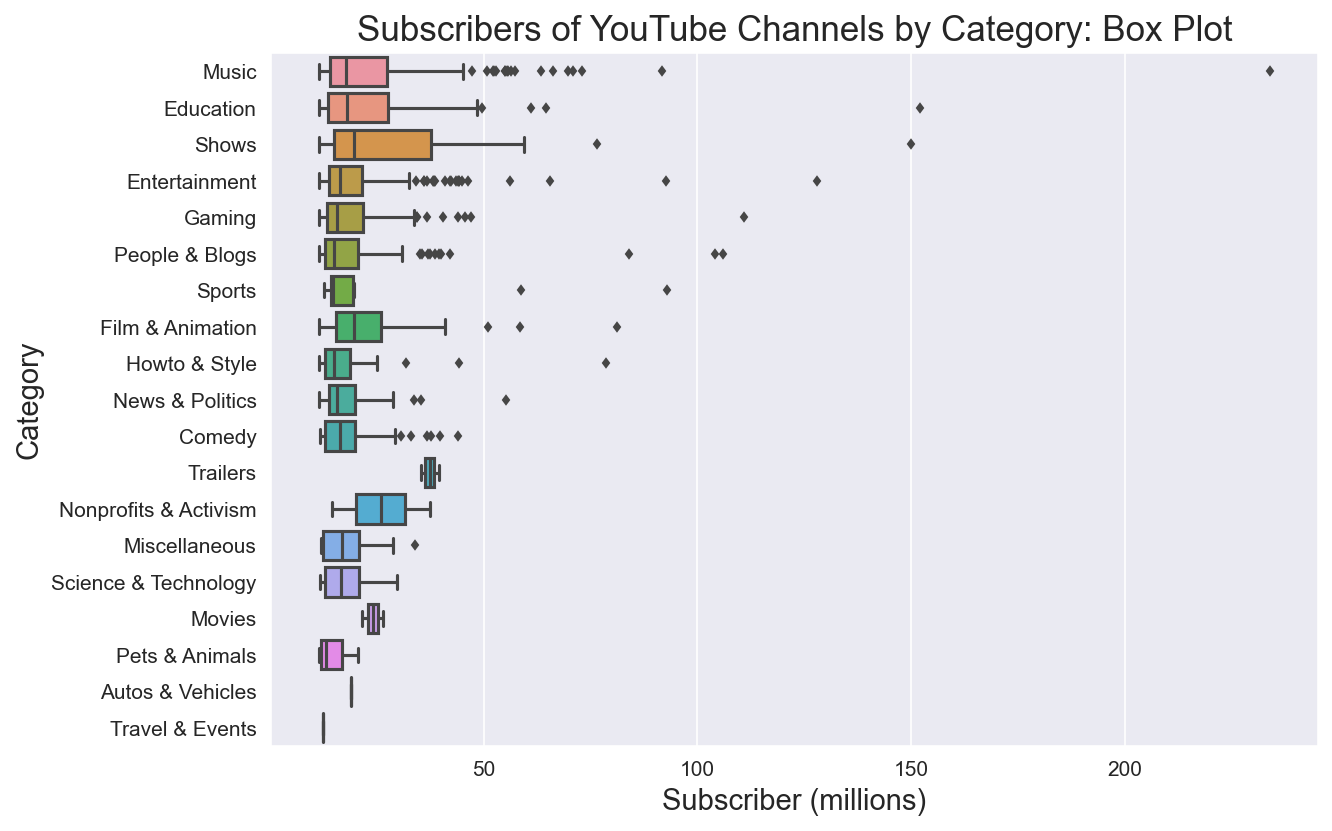

In [22]:
sns.boxplot(x = video_views['Subscribers'] / 1000000, y='Category', data=video_views, fliersize=3)
plt.title('Subscribers of YouTube Channels by Category: Box Plot')
plt.xlabel('Subscriber (millions)');

The box plot reveals that the categories with the highest median number of views are Trailers, Nonprofits & Activism, Movies, and Shows, with Travel & Events having the lowest median.

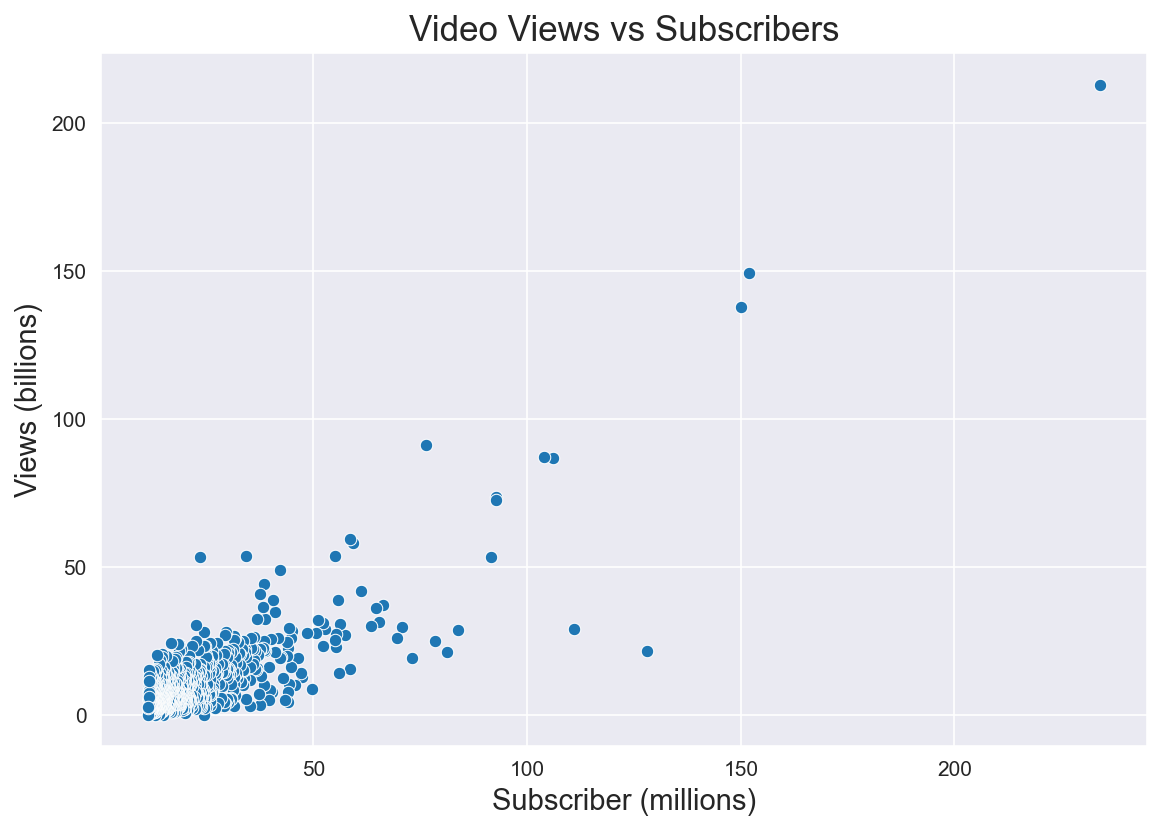

In [56]:
sns.scatterplot(x = video_views['Subscribers'] / 1000000, y=video_views['Video Views']/1000000000, data=video_views)
plt.title('Video Views vs Subscribers')
plt.xlabel('Subscriber (millions)')
plt.ylabel('Views (billions)');

We can see, We have a strong correlation between views and subscribers. Does this mean having more subscribers leads to more views?

As time goes on, subscribers get less prioritised views get more prioritised. It is difficult to answer that more subscriber means more views. There are plenty of channels that get more views compared to their subscriber count. We only seeing the top 1000 channels. YouTube Algorithm plays a key role here. YouTube is more likely to show videos to users who are more likely to watch the video based on their viewing history.

In conclusion, having a large number of subscribers can certainly help increase a channel's visibility on YouTube. The relationship between subscriber count and views is not always straightforward, and success on YouTube is not guaranteed even with a large following. 

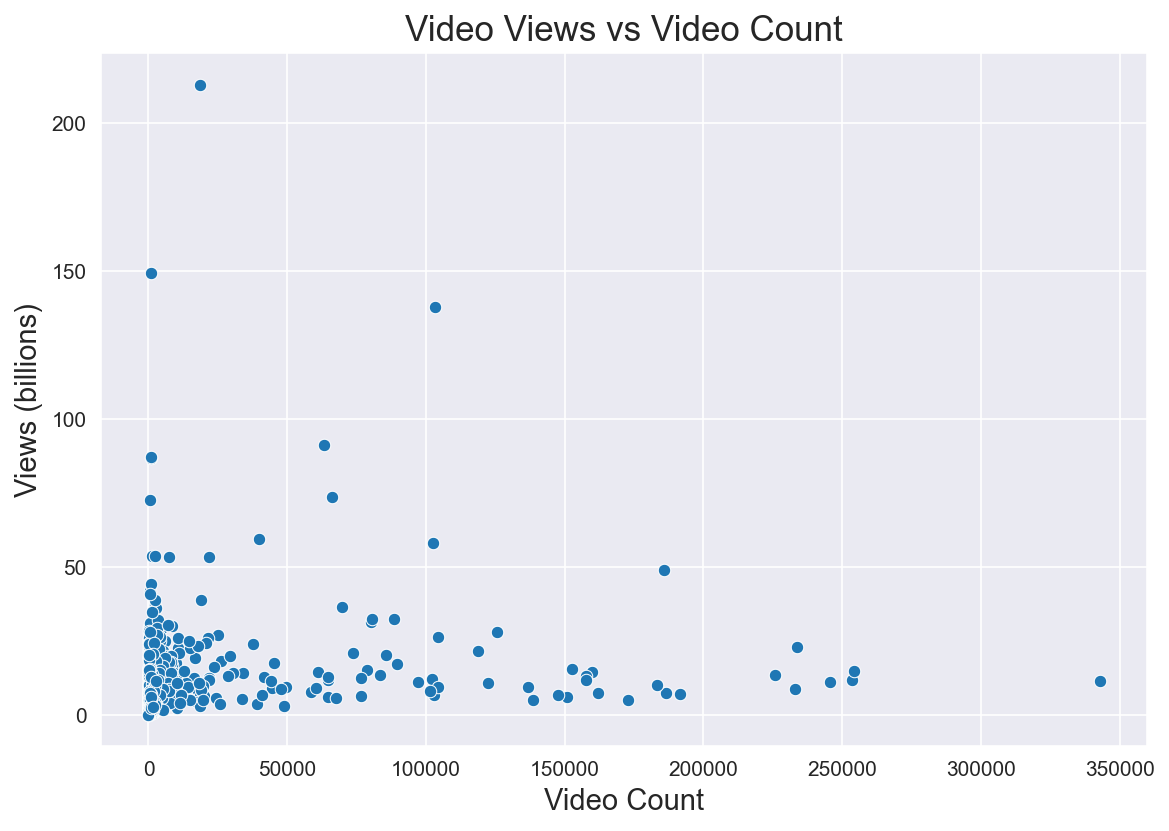

In [58]:
sns.scatterplot(x='Video Count', y=video_count['Video Views'] / 1000000000, data=video_count)
plt.title('Video Views vs Video Count')
plt.ylabel('Views (billions)');

In the world of YouTube, it's not always the case that more is better. Just because a channel has a ton of videos, that doesn't mean they're going to get a ton of views. Take news and politics, for example. They might have more videos than you can shake a stick at, but they're not exactly raking in the views. So what gives? Well, it all boils down to quality over quantity. The channels that succeed on YouTube are the ones that consistently put out high-quality, engaging content. 